In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.download(a, start='2010-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,39.663860,1132.989990
2010-01-05,39.676838,1136.520020
2010-01-06,39.488621,1137.140015
2010-01-07,39.274479,1141.689941
2010-01-08,39.222588,1144.979980


<Axes: xlabel='Date'>

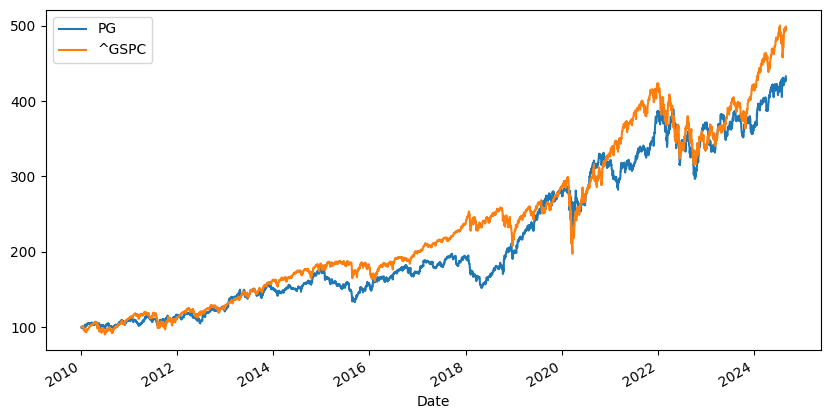

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
log_returns.mean() * 250

PG       0.099239
^GSPC    0.108872
dtype: float64

In [7]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029078,0.016148
^GSPC,0.016148,0.029946


In [8]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.547225
^GSPC,0.547225,1.000000


In [9]:
num_assets = len(assets)
num_assets

2

In [10]:
arr = np.random.random(2)
arr

array([0.31737413, 0.31532387])

In [11]:
arr[0] + arr[1]

np.float64(0.6326979992551262)

In [12]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.14408805, 0.85591195])

In [13]:
weights[0] + weights[1]

np.float64(1.0)

Expected Portfolio Return:

In [14]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.1074838730277533)

Expected Portfolio Variance

In [15]:
np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))

np.float64(0.026525063367330685)

Expected Portfolio Volatilty

In [16]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

np.float64(0.16286516928837388)

In [17]:
pfolio_returns = []
pfolio_volatilities = []	

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    

In [20]:
pfolio_volatilities = []
pfolio_returns = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10683927, 0.10353825, 0.10704239, 0.10508701, 0.1063741 ,
        0.10517518, 0.10615006, 0.10490347, 0.10606806, 0.1067249 ,
        0.10345966, 0.10681812, 0.09928398, 0.10850539, 0.10795907,
        0.10174541, 0.1047343 , 0.10219542, 0.10242835, 0.10675677,
        0.10623738, 0.10560333, 0.10340604, 0.09956226, 0.10574955,
        0.10333419, 0.10614496, 0.10265205, 0.10574454, 0.10631809,
        0.10057695, 0.10019051, 0.10364012, 0.10211772, 0.0992852 ,
        0.10810291, 0.10109707, 0.10153022, 0.1059866 , 0.10279038,
        0.10464849, 0.09969378, 0.10678418, 0.10184741, 0.10422415,
        0.10277777, 0.10584342, 0.102017  , 0.10088013, 0.10123801,
        0.10428567, 0.10020882, 0.10145285, 0.10327578, 0.10456804,
        0.10402408, 0.10194892, 0.10579928, 0.10490407, 0.1016007 ,
        0.10128856, 0.10363612, 0.10284186, 0.10537681, 0.10512226,
        0.10735495, 0.10367445, 0.10060065, 0.10304251, 0.10684836,
        0.10845797, 0.10509456, 0.10373846, 0.10

Text(0, 0.5, 'Expected Return')

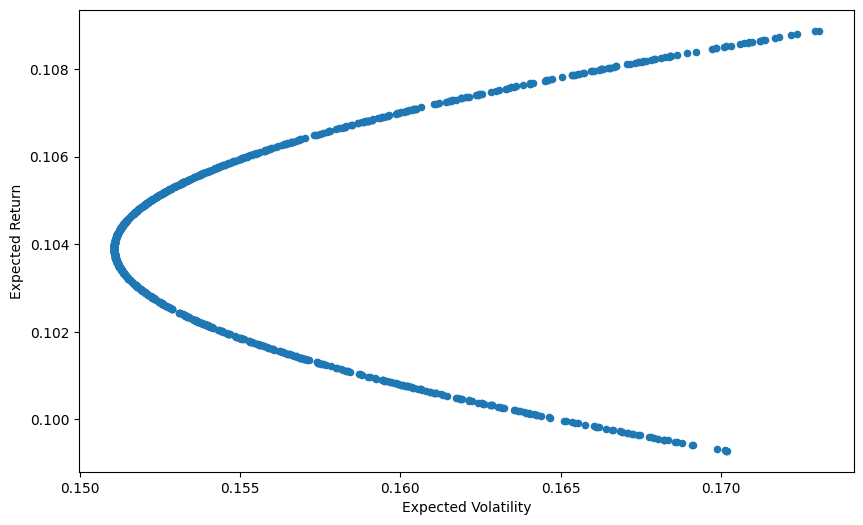

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')